# Import Lib

In [2]:
import pandas as pd
from pycaret.clustering import *

In [3]:
dataset = pd.read_csv('customer-segmentation.csv')
df = dataset.copy()

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Setup Environment

In [5]:
s = setup(df, normalize=True, ignore_features=['Row ID'], use_gpu=True)

,Description,Value
0,session_id,7046
1,Original Data,"(9800, 18)"
2,Missing Values,True
3,Numeric Features,2
4,Categorical Features,13
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(9800, 10876)"
9,CPU Jobs,-1


# Create Model

In [6]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.056,492.3662,3.2832,0,0,0


In [7]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7046, tol=0.0001, verbose=0)


# Plotting

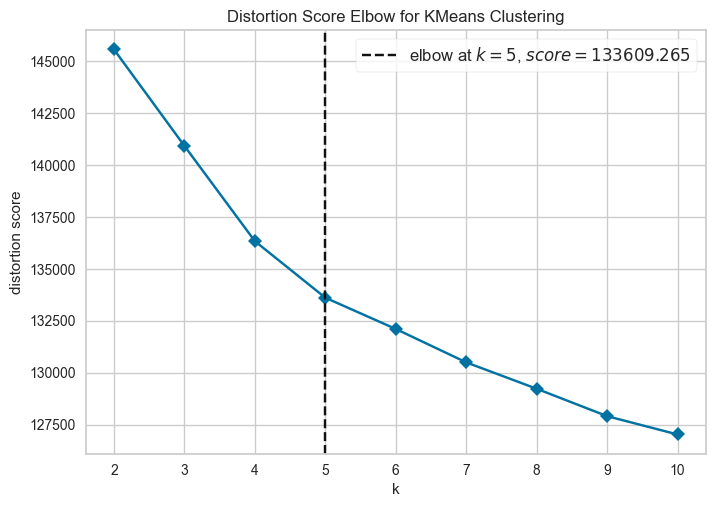

In [10]:
plot_model(kmeans, plot = 'elbow')

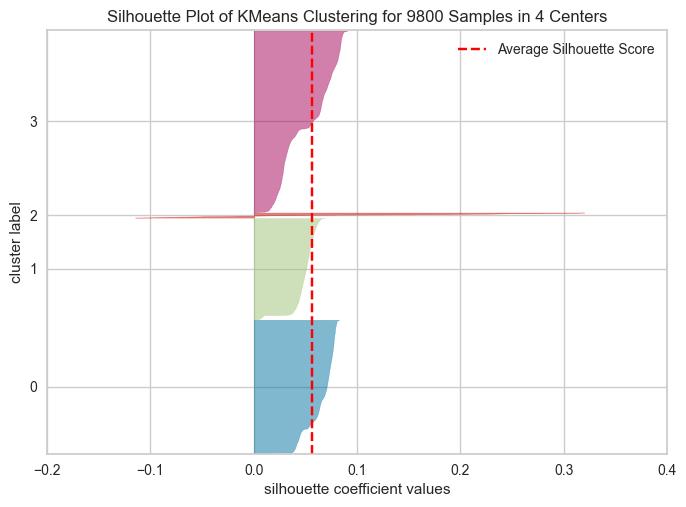

In [11]:
plot_model(kmeans, plot = 'silhouette')

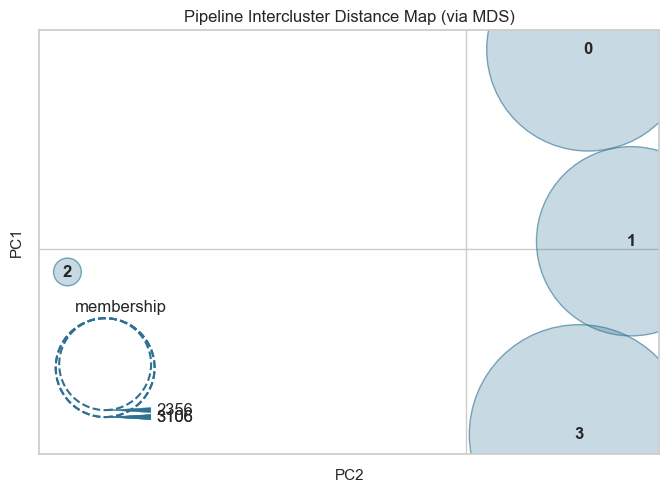

In [12]:
plot_model(kmeans, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'distribution')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
plot_model(kmeans, plot = 'cluster')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [14]:
plot_model(kmeans, plot = 'tsne')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [15]:
result = assign_model(kmeans)
result.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Cluster
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Cluster 3
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Cluster 3
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Cluster 0
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Cluster 3
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Cluster 3


In [17]:
result.to_csv('clustering_PyCaret.csv')

# Result

In [3]:
hasil = pd.read_csv('clustering_PyCaret.csv')
hasil

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Cluster
0,0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Cluster 3
1,1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Cluster 3
2,2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Cluster 0
3,3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Cluster 3
4,4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Cluster 1
9796,9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Cluster 3
9797,9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Cluster 3
9798,9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Cluster 3


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

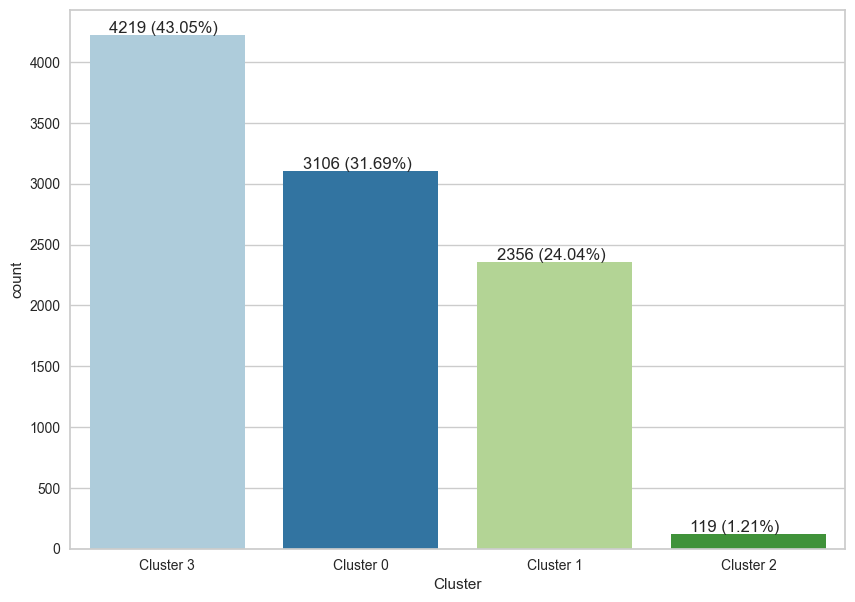

In [5]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=hasil, x='Cluster', palette='Paired')

for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(hasil)), (p.get_x()+0.1, p.get_height()+20))

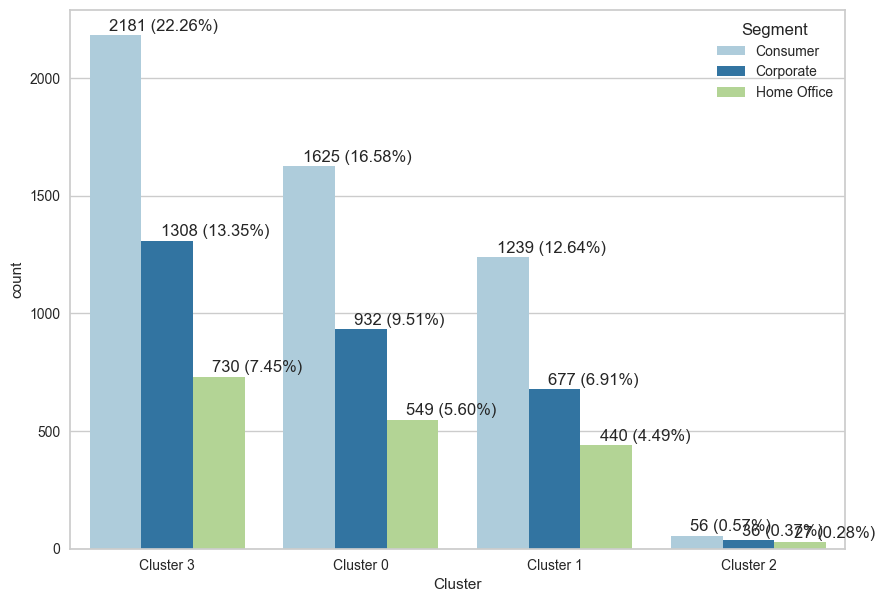

In [6]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=hasil, x='Cluster', hue='Segment', palette='Paired')

for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(hasil)), (p.get_x()+0.1, p.get_height()+20))

Text(0.5, 1.0, 'Clustering')

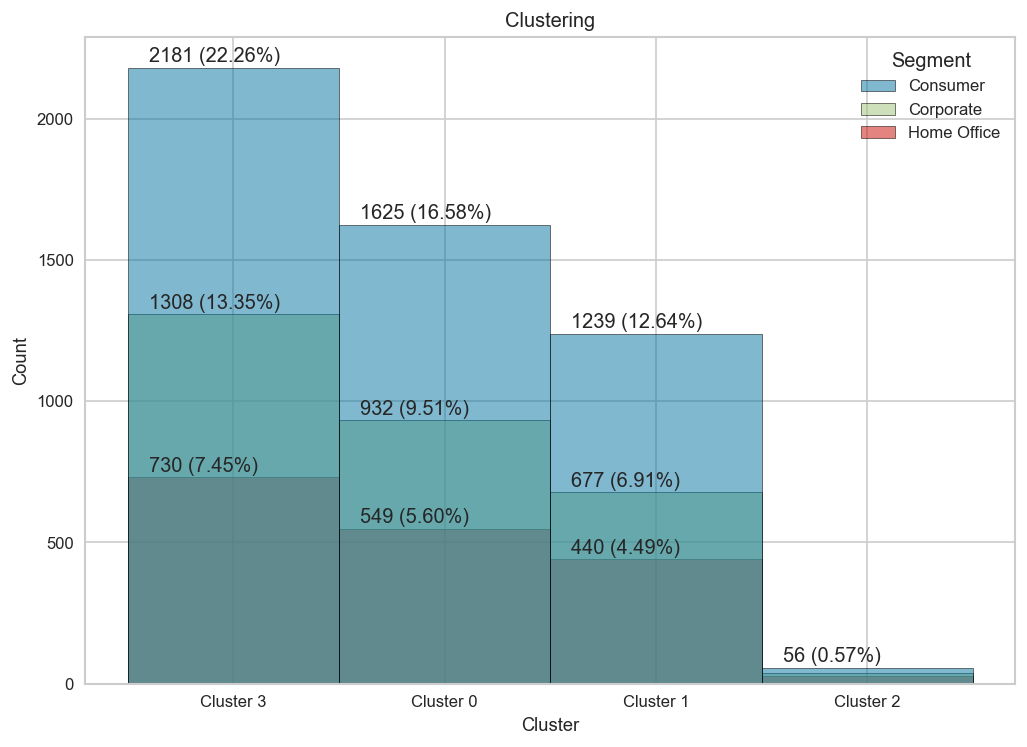

In [17]:
plt.figure(figsize=(10,7), dpi=120)
ax = sns.histplot(data=hasil, x='Cluster', hue='Segment')

for p in ax.patches:
    if p.get_height() < 37:
        continue
    ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(hasil)), (p.get_x()+0.1, p.get_height()+20))
    # print(p)

plt.title('Clustering')

Text(0.5, 1.0, 'Clustering')

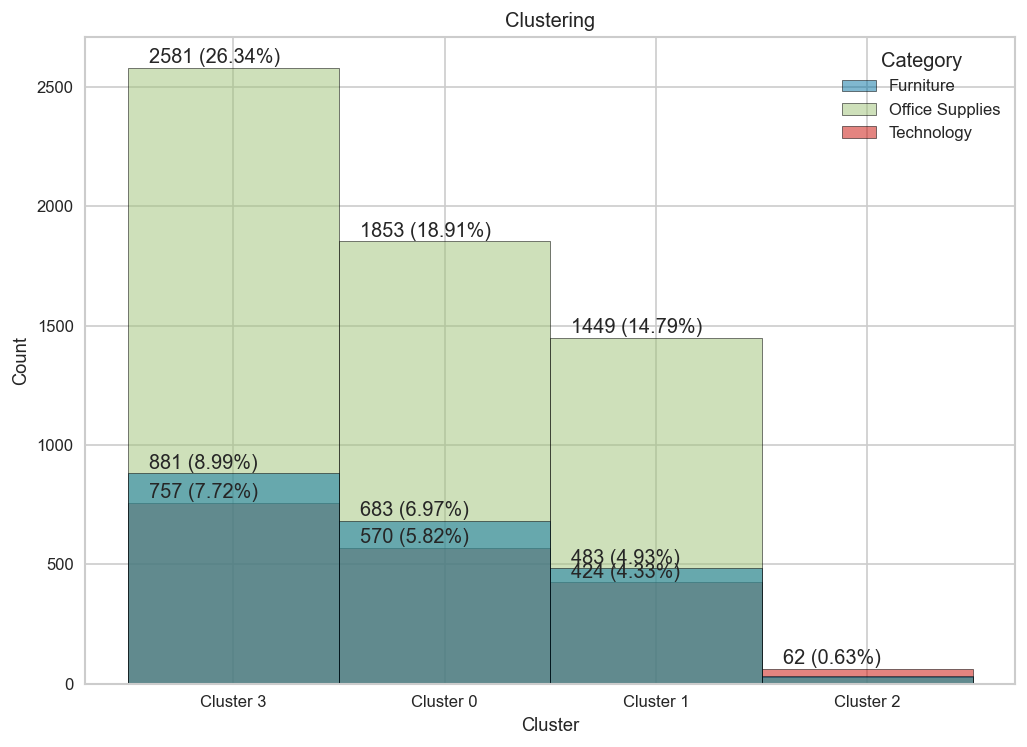

In [24]:
plt.figure(figsize=(10,7), dpi=120)
ax = sns.histplot(data=hasil, x='Cluster', hue='Category')

for p in ax.patches:
    if p.get_height() < 37:
        continue
    ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(hasil)), (p.get_x()+0.1, p.get_height()+20))
    # print(p)

plt.title('Clustering')

Text(0.5, 1.0, 'Clustering')

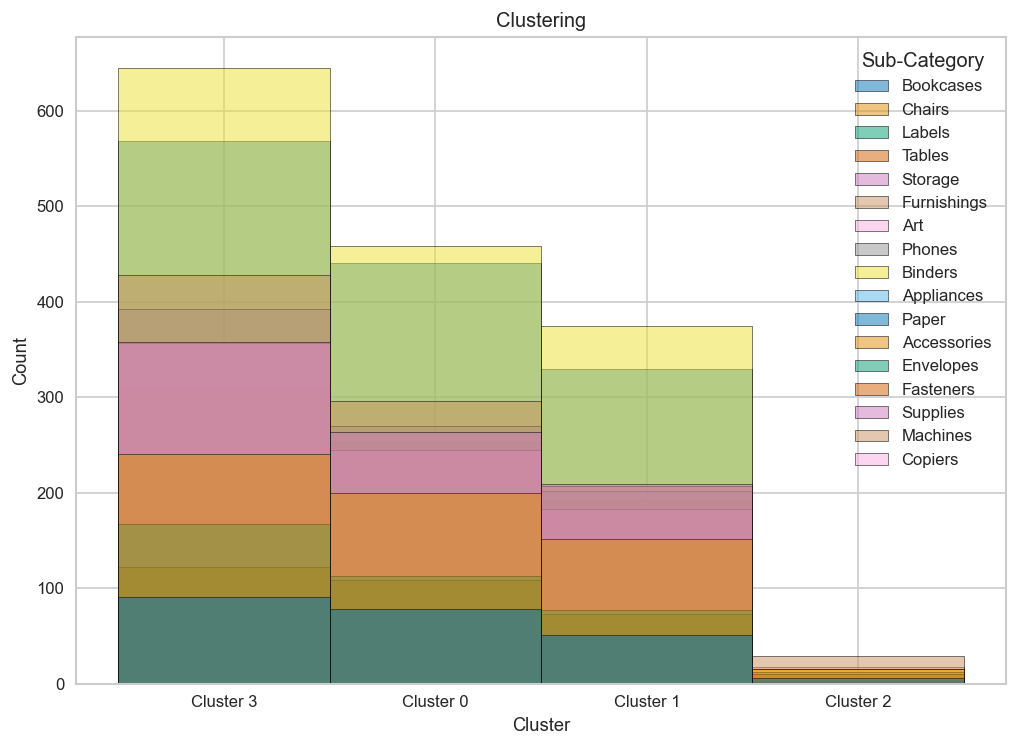

In [30]:
plt.figure(figsize=(10,7), dpi=120)
ax = sns.histplot(data=hasil, x='Cluster', hue='Sub-Category', palette="colorblind")

# for p in ax.patches:
#     if p.get_height() < 37:
#         continue
#     ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(hasil)), (p.get_x()+0.1, p.get_height()+20))
    # print(p)

plt.title('Clustering')

Text(0.5, 1.5, 'Clustering Distribution/Proporsion')

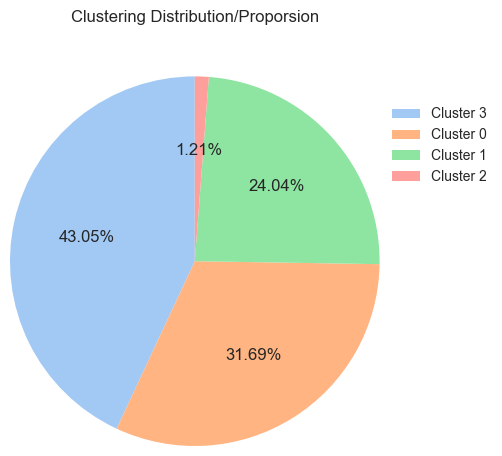

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
colors = sns.color_palette('pastel')

clus_size = hasil['Cluster'].value_counts()
wedges, texts, autotexts = ax.pie(x=clus_size, startangle=90, colors=colors,
            autopct='%.2f%%', radius=2)

ax.legend(clus_size.index, 
           loc='center left', bbox_to_anchor=(1.3, 0.5, 0.5, 1)) 

ax.set_title('Clustering Distribution/Proporsion', y=1.5)

In [42]:
temp = hasil.groupby('Customer ID').agg(count=('Customer ID','count'),
        sales_sum=('Sales','sum'))\
            .sort_values(by=['count', 'sales_sum'], ascending=False)
temp

,count,sales_sum
Customer ID,,
WB-21850,35,6129.710
PP-18955,34,7252.608
MA-17560,34,4299.161
JL-15835,33,9576.343
SV-20365,32,11470.950
...,...,...
AO-10810,1,161.280
RE-19405,1,48.360
CJ-11875,1,16.520
